In [1]:
import pandas as pd
import numpy as np
import scipy.stats
import matplotlib
import matplotlib.pyplot as pp
from IPython import display
from IPython.display import Image
from ipywidgets import interact, widgets
%matplotlib inline

In [4]:
smoking = pd.read_csv('Datos/whickham/whickham.xls')

In [5]:
smoking.head(3)

,outcome,smoker,age
0,Alive,Yes,23
1,Alive,Yes,18
2,Dead,Yes,71


In [7]:
smoking.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1314 entries, 0 to 1313
Data columns (total 3 columns):
outcome    1314 non-null object
smoker     1314 non-null object
age        1314 non-null int64
dtypes: int64(1), object(2)
memory usage: 20.6+ KB


In [8]:
smoking.describe()

,age
count,1314.000000
mean,46.920091
std,17.432027
min,18.000000
25%,32.000000
50%,46.000000
75%,61.000000
max,84.000000


In [9]:
pd.DataFrame(smoking.smoker.value_counts())

,smoker
No,732
Yes,582


In [10]:
pd.DataFrame(smoking.outcome.value_counts())

,outcome
Alive,945
Dead,369


In [11]:
pd.DataFrame(smoking.outcome.value_counts(normalize = True))

,outcome
Alive,0.719178
Dead,0.280822


In [20]:
bysmoker = smoking.groupby("smoker").outcome.value_counts(normalize = True)

In [21]:
bysmoker

smoker  outcome
No      Alive      0.685792
        Dead       0.314208
Yes     Alive      0.761168
        Dead       0.238832
Name: outcome, dtype: float64

In [22]:
bysmoker.index

MultiIndex(levels=[['No', 'Yes'], ['Alive', 'Dead']],
           labels=[[0, 0, 1, 1], [0, 1, 0, 1]],
           names=['smoker', 'outcome'])

In [24]:
bysmoker.unstack()

outcome,Alive,Dead
smoker,,
No,0.685792,0.314208
Yes,0.761168,0.238832


In [26]:
smoking['ageGroup'] = pd.cut(smoking.age, [0,30,40,53,64], labels=['0-30', '30-40', '40-53', '53-64'])

In [27]:
smoking['ageGroup'].head()

0     0-30
1     0-30
2      NaN
3      NaN
4    53-64
Name: ageGroup, dtype: category
Categories (4, object): [0-30 < 30-40 < 40-53 < 53-64]

In [28]:
smoking['age'].head()

0    23
1    18
2    71
3    67
4    64
Name: age, dtype: int64

In [29]:
byage = smoking.groupby(['ageGroup', 'smoker']).outcome.value_counts(normalize = True)

In [34]:
byage.unstack().drop("Dead", axis=1)

outcome             Alive
ageGroup smoker          
0-30     No      0.981818
         Yes     0.975610
30-40    No      0.955224
         Yes     0.940678
40-53    No      0.876106
         Yes     0.802395
53-64    No      0.669291
         Yes     0.580645

In [35]:
byage

ageGroup  smoker  outcome
0-30      No      Alive      0.981818
                  Dead       0.018182
          Yes     Alive      0.975610
                  Dead       0.024390
30-40     No      Alive      0.955224
                  Dead       0.044776
          Yes     Alive      0.940678
                  Dead       0.059322
40-53     No      Alive      0.876106
                  Dead       0.123894
          Yes     Alive      0.802395
                  Dead       0.197605
53-64     No      Alive      0.669291
                  Dead       0.330709
          Yes     Alive      0.580645
                  Dead       0.419355
Name: outcome, dtype: float64

Text(0.5, 1.0, 'smoker')

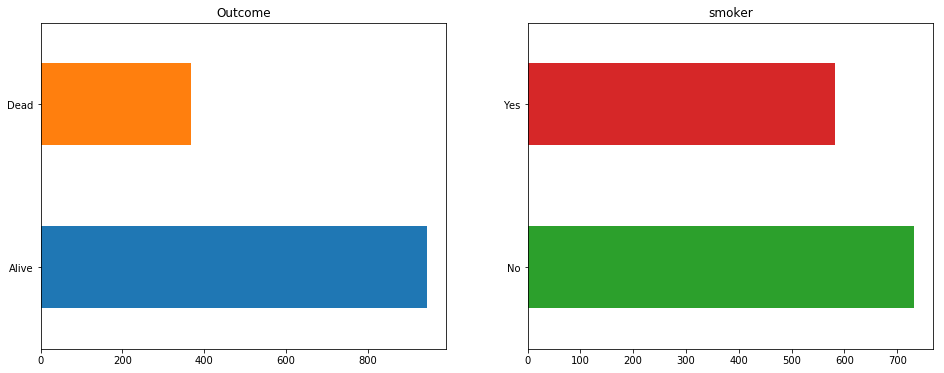

In [45]:
pp.figure(figsize=(16,6))
pp.subplot(1,2,1);smoking.outcome.value_counts().plot(kind='barh', color = ['C0', 'C1']);pp.title('Outcome')
pp.subplot(1,2,2);smoking.smoker.value_counts().plot(kind='barh', color = ['C2', 'C3']);pp.title('smoker')

Text(0.5, 1.0, 'smoker')

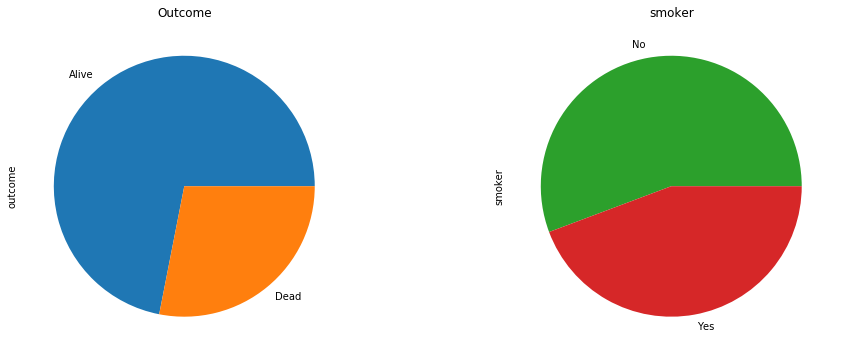

In [46]:
pp.figure(figsize=(16,6))
pp.subplot(1,2,1);smoking.outcome.value_counts().plot(kind='pie', colors = ['C0', 'C1']);pp.title('Outcome')
pp.subplot(1,2,2);smoking.smoker.value_counts().plot(kind='pie', colors = ['C2', 'C3']);pp.title('smoker')

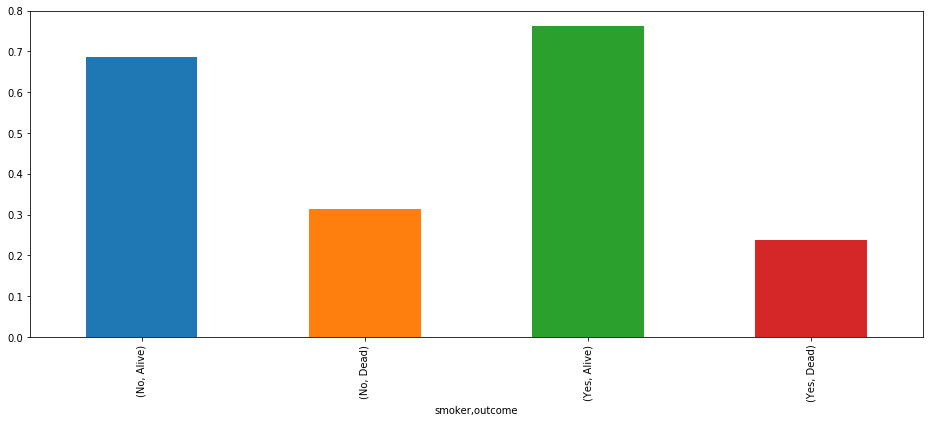

In [50]:
bysmoker.plot(kind="bar", figsize=(16,6))

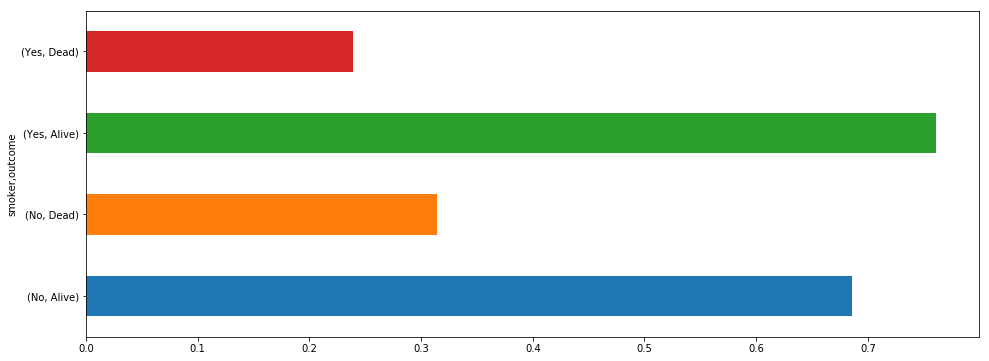

In [51]:
bysmoker.plot(kind="barh", figsize=(16,6))

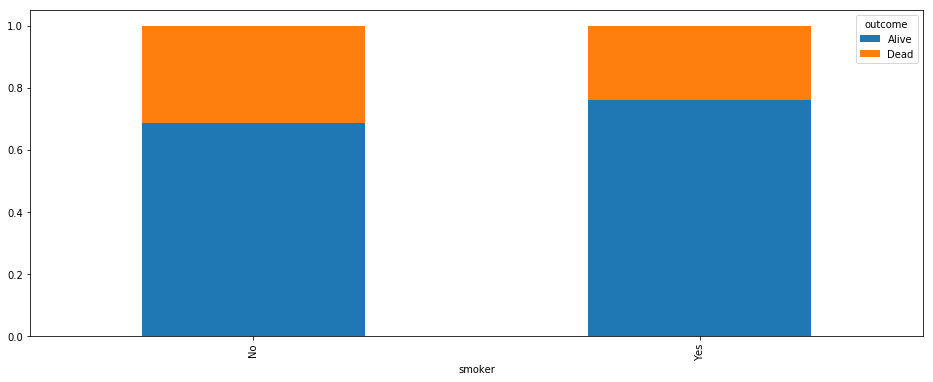

In [56]:
bysmoker.unstack().plot(kind='bar', stacked = True, figsize=(16,6))

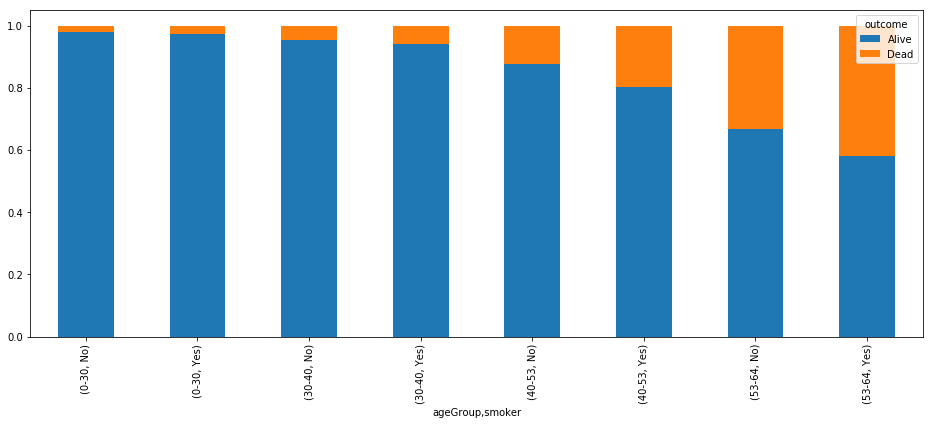

In [57]:
byage.unstack().plot(kind='bar', stacked = True, figsize=(16,6))

In [58]:
byage.unstack().drop("Dead", axis = 1).unstack()

outcome      Alive          
smoker          No       Yes
ageGroup                    
0-30      0.981818  0.975610
30-40     0.955224  0.940678
40-53     0.876106  0.802395
53-64     0.669291  0.580645

In [59]:
byAgeDos = byage.unstack().drop("Dead", axis = 1).unstack()
byAgeDos.columns = ["No", "Yes"]
byAgeDos.columns.name = "smoker"

In [60]:
byAgeDos

smoker,No,Yes
ageGroup,,
0-30,0.981818,0.975610
30-40,0.955224,0.940678
40-53,0.876106,0.802395
53-64,0.669291,0.580645


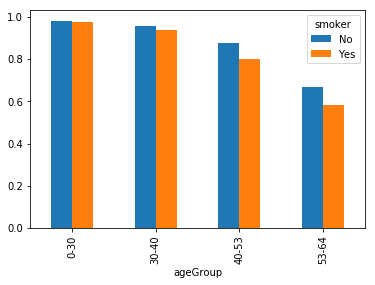

In [62]:
byAgeDos.plot(kind='bar')